# Data Cleaning

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
#!conda install -c conda-forge folium=0.5.0 --yes
import folium
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans

In [2]:
rest_df=pd.read_csv('Vegetarian_and_Vegan_Restaurants.csv')
rest_df.head()

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,claimed,country,cuisines,...,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province,sic,sourceURLs,twitter,websites,yearOpened
0,AVwd3yXEkufWRAb59-sH,2016-04-22T02:47:48Z,2018-09-10T21:00:49Z,1045 San Pablo Ave,"Restaurant,Asian/Pacific,Cafe,Vegetarian / Veg...",Accommodation & Food Services,Albany,NaN,US,"Thai,Asian/Pacific,Vegetarian",...,94706,NaN,NaN,NaN,CA,NaN,https://foursquare.com/v/potala-organic-cafe/4...,NaN,"http://www.potala.us/,http://potala.us",NaN
1,AVwd3yXEkufWRAb59-sH,2016-04-22T02:47:48Z,2018-09-10T21:00:49Z,1045 San Pablo Ave,"Restaurant,Asian/Pacific,Cafe,Vegetarian / Veg...",Accommodation & Food Services,Albany,NaN,US,"Thai,Asian/Pacific,Vegetarian",...,94706,NaN,NaN,NaN,CA,NaN,https://foursquare.com/v/potala-organic-cafe/4...,NaN,"http://www.potala.us/,http://potala.us",NaN
2,AVwd3yXEkufWRAb59-sH,2016-04-22T02:47:48Z,2018-09-10T21:00:49Z,1045 San Pablo Ave,"Restaurant,Asian/Pacific,Cafe,Vegetarian / Veg...",Accommodation & Food Services,Albany,NaN,US,"Thai,Asian/Pacific,Vegetarian",...,94706,NaN,NaN,NaN,CA,NaN,https://foursquare.com/v/potala-organic-cafe/4...,NaN,"http://www.potala.us/,http://potala.us",NaN
3,AVwd3yXEkufWRAb59-sH,2016-04-22T02:47:48Z,2018-09-10T21:00:49Z,1045 San Pablo Ave,"Restaurant,Asian/Pacific,Cafe,Vegetarian / Veg...",Accommodation & Food Services,Albany,NaN,US,"Thai,Asian/Pacific,Vegetarian",...,94706,NaN,NaN,NaN,CA,NaN,https://foursquare.com/v/potala-organic-cafe/4...,NaN,"http://www.potala.us/,http://potala.us",NaN
4,AVwd3yXEkufWRAb59-sH,2016-04-22T02:47:48Z,2018-09-10T21:00:49Z,1045 San Pablo Ave,"Restaurant,Asian/Pacific,Cafe,Vegetarian / Veg...",Accommodation & Food Services,Albany,NaN,US,"Thai,Asian/Pacific,Vegetarian",...,94706,NaN,NaN,NaN,CA,NaN,https://foursquare.com/v/potala-organic-cafe/4...,NaN,"http://www.potala.us/,http://potala.us",NaN


In [3]:
rest_df.columns

Index(['id', 'dateAdded', 'dateUpdated', 'address', 'categories',
       'primaryCategories', 'city', 'claimed', 'country', 'cuisines',
       'descriptions.dateSeen', 'descriptions.sourceURLs',
       'descriptions.value', 'facebookPageURL', 'features.key',
       'features.value', 'hours.day', 'hours.dept', 'hours.hour', 'imageURLs',
       'isClosed', 'keys', 'languagesSpoken', 'latitude', 'longitude',
       'menuPageURL', 'menus.amountMax', 'menus.amountMin', 'menus.category',
       'menus.currency', 'menus.dateSeen', 'menus.description', 'menus.name',
       'menus.sourceURLs', 'name', 'paymentTypes', 'phones', 'postalCode',
       'priceRangeCurrency', 'priceRangeMin', 'priceRangeMax', 'province',
       'sic', 'sourceURLs', 'twitter', 'websites', 'yearOpened'],
      dtype='object')

In [4]:
red_rest_df=rest_df[['province','name','latitude','longitude','categories']].copy()
red_rest_df=red_rest_df.groupby('name').max().reset_index()
red_rest_df.sort_values('province',inplace=True)
red_rest_df.reset_index(inplace=True)
red_rest_df.drop(['index'],axis=1,inplace=True)
red_rest_df.size

1045

In [5]:
red_rest_df.tail()

,name,province,latitude,longitude,categories
204,Carmelita,WA,47.682262,-122.354996,"Restaurant,Mediterranean,Vegetarian,Restaurants"
205,Le Voyeur,WA,47.045206,-122.897832,"Bars Clubs,Restaurant,Vegetarian / Vegan Resta..."
206,Tallulah's,WA,47.624410,-122.307300,"Restaurant,Bar,Cafe,American,Breakfast & Brunc..."
207,Spicy Talk Bistro,WA,47.673385,-122.118117,"Restaurant,Restaurants"
208,Zuppa's,WI,44.154652,-88.462336,"Restaurant,Catering,Restaurants"


In [6]:
st_inc_df=pd.read_excel('U.S. State-Level Income Inequality Data.xlsx')
st_inc_df.head()

,Year,State,Labor force participation,Unemployment rate,Average household size,Poverty rate,"Number of corruption convictions per 1,000,000 people",Gini coefficient,GDP per capita,Log of GDP per capita,Age,People with less than 9 years of education/people with college degree or above,Black/white,Hispanic/white,Location
0,2005,Alabama,61.7,4.5,2.48,13.7,5.68951,0.473,40829.086059,10.61715,37.4,0.297289,0.369125,0.032012,south
1,2006,Alabama,61.5,4.0,2.50,12.6,11.01750,0.472,40181.420855,10.60116,37.2,0.313032,0.379650,0.035133,south
2,2007,Alabama,61.1,4.0,2.48,13.1,11.12810,0.471,40162.941652,10.60070,37.3,0.296267,0.380464,0.037591,south
3,2008,Alabama,60.6,5.7,2.50,12.0,3.64658,0.467,39747.411561,10.59030,37.4,0.278940,0.382851,0.040826,south
4,2009,Alabama,59.7,11.0,2.48,13.4,4.88457,0.471,37807.017026,10.54025,37.4,0.273045,0.384310,0.046357,south


In [7]:
st_inc_df.columns

Index(['Year', 'State', 'Labor force participation', 'Unemployment rate',
       'Average household size', 'Poverty rate',
       'Number of corruption convictions per 1,000,000 people',
       'Gini coefficient', 'GDP per capita', 'Log of GDP per capita', 'Age',
       'People with less than 9 years of education/people with college degree or above',
       'Black/white', 'Hispanic/white', 'Location'],
      dtype='object')

In [8]:
new_df=st_inc_df.groupby('State').mean().reset_index()
new_df.head()

,State,Year,Labor force participation,Unemployment rate,Average household size,Poverty rate,"Number of corruption convictions per 1,000,000 people",Gini coefficient,GDP per capita,Log of GDP per capita,Age,People with less than 9 years of education/people with college degree or above,Black/white,Hispanic/white
0,Alabama,2010,59.354545,7.036364,2.530000,13.827273,4.832377,0.473109,39106.611576,10.573766,37.854545,0.258703,0.390730,0.049480
1,Alaska,2010,69.563636,7.018182,2.799091,7.027273,6.743892,0.415373,74640.425374,11.219765,33.409091,0.114210,0.054114,0.094067
2,Arizona,2010,62.245455,7.063636,2.724545,12.054545,4.132747,0.458882,41854.130475,10.640675,35.800000,0.256026,0.067054,0.520927
3,Arkansas,2010,60.827273,6.481818,2.516364,13.963636,2.873638,0.464255,37320.229555,10.527005,37.400000,0.323741,0.209076,0.081024
4,California,2010,64.172727,8.281818,2.952727,11.190909,1.895740,0.476300,57225.127065,10.954160,35.209091,0.341333,0.147628,0.925182


In [9]:
a=new_df['State'].unique()
len(a)

50

In [10]:
url='https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States'

In [11]:
all_tables=pd.read_html(url)
postal_abrev_=all_tables[0]['Flag, name andpostal abbreviation[12]']
postal_abrev=postal_abrev_.rename(columns={'Flag, name andpostal abbreviation[12]':'State',
                                           'Flag, name andpostal abbreviation[12].1':'Abreviation'})

In [12]:
mean_st_inc_df=new_df.join(postal_abrev['Abreviation'])
mean_st_inc_df.head()

,State,Year,Labor force participation,Unemployment rate,Average household size,Poverty rate,"Number of corruption convictions per 1,000,000 people",Gini coefficient,GDP per capita,Log of GDP per capita,Age,People with less than 9 years of education/people with college degree or above,Black/white,Hispanic/white,Abreviation
0,Alabama,2010,59.354545,7.036364,2.530000,13.827273,4.832377,0.473109,39106.611576,10.573766,37.854545,0.258703,0.390730,0.049480,AL
1,Alaska,2010,69.563636,7.018182,2.799091,7.027273,6.743892,0.415373,74640.425374,11.219765,33.409091,0.114210,0.054114,0.094067,AK
2,Arizona,2010,62.245455,7.063636,2.724545,12.054545,4.132747,0.458882,41854.130475,10.640675,35.800000,0.256026,0.067054,0.520927,AZ
3,Arkansas,2010,60.827273,6.481818,2.516364,13.963636,2.873638,0.464255,37320.229555,10.527005,37.400000,0.323741,0.209076,0.081024,AR
4,California,2010,64.172727,8.281818,2.952727,11.190909,1.895740,0.476300,57225.127065,10.954160,35.209091,0.341333,0.147628,0.925182,CA


In [13]:
mean_st_inc_df.drop(columns=['Year','Number of corruption convictions per 1,000,000 people','Log of GDP per capita','Age',
                             'Black/white','Hispanic/white'],inplace=True)
mean_st_inc_df.head()

,State,Labor force participation,Unemployment rate,Average household size,Poverty rate,Gini coefficient,GDP per capita,People with less than 9 years of education/people with college degree or above,Abreviation
0,Alabama,59.354545,7.036364,2.530000,13.827273,0.473109,39106.611576,0.258703,AL
1,Alaska,69.563636,7.018182,2.799091,7.027273,0.415373,74640.425374,0.114210,AK
2,Arizona,62.245455,7.063636,2.724545,12.054545,0.458882,41854.130475,0.256026,AZ
3,Arkansas,60.827273,6.481818,2.516364,13.963636,0.464255,37320.229555,0.323741,AR
4,California,64.172727,8.281818,2.952727,11.190909,0.476300,57225.127065,0.341333,CA


In [14]:
ny_lat=40.782339
ny_long=-73.387347

In [15]:
CLIENT_ID = 'HIAF21VJXTKALI35TKU3RJF0IROXXFLQE1FJODUTEVGR1XZ1'
CLIENT_SECRET = '3HSPB5EWZWUT3J1U4BLFKDTWIND5VSJBPSFQLOMULIQGOTEH'
VERSION = '20180605'
LIMIT = 100
def getNearbyVenues(lat, lng, query,place='New York', abrev='NY', radius=50000):
    
    venues_list=[]
            
        # create the API request URL
    url='https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&query={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        query,
        lat, 
        lng, 
        radius, 
        LIMIT)
            
        # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
    venues_list.append([(v['venue']['name'],place,abrev,v['venue']['location']['lat'],v['venue']['location']['lng'],
                         v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Name','States','Abreviature','Latitude','Longitude','Category']
    
    return(nearby_venues)

In [16]:
vegan_df=getNearbyVenues(lat=ny_lat,lng=ny_long,query='vegan')
vegetarian_df=getNearbyVenues(lat=ny_lat,lng=ny_long,query='vegetarian')

In [17]:
vegetarian_df.tail()

,Name,States,Abreviature,Latitude,Longitude,Category
95,Lota Veco,New York,NY,40.886736,-73.328789,Vegetarian / Vegan Restaurant
96,Fuel Your Body Cafe,New York,NY,40.762664,-73.528713,American Restaurant
97,Joy Curry and Tandoor,New York,NY,40.753520,-73.973612,Indian Restaurant
98,Organically Yours,New York,NY,40.900201,-73.349963,Vegetarian / Vegan Restaurant
99,Skinny Pizza,New York,NY,40.786022,-73.649413,Pizza Place


In [18]:
vegan_names_ny=vegan_df['Name'].copy()
vegetarian_names_ny=vegetarian_df['Name'].copy()

In [19]:
for name in vegan_names_ny:
    if name in vegetarian_names_ny:
        pass
    else:
        vegan_row=vegan_df.loc[vegan_df['Name']==name]
        vegetarian_df=vegetarian_df.append(vegan_row)

In [20]:
vegetarian_df.tail()

,Name,States,Abreviature,Latitude,Longitude,Category
95,Wild Ginger Pan-Asian Vegan Cuisine,New York,NY,40.718986,-73.955267,Vegetarian / Vegan Restaurant
96,Toast & Co.,New York,NY,40.873823,-73.424831,New American Restaurant
97,bee-Organic,New York,NY,40.872152,-73.427400,Vegetarian / Vegan Restaurant
98,Cindysnacks,New York,NY,40.878468,-73.424940,Vegetarian / Vegan Restaurant
99,Lota Veco,New York,NY,40.886736,-73.328789,Vegetarian / Vegan Restaurant


In [21]:
rest_abrev_col=red_rest_df['province'].copy()
rest_abrev_col=rest_abrev_col.to_list()
state_names=[]
for abrv in rest_abrev_col:
    state_index=postal_abrev[postal_abrev['Abreviation']==abrv].index.values[0]
    state_names.append(postal_abrev.at[state_index,'State'])
new_col=pd.DataFrame.from_dict({'States':state_names})
red_rest_df=red_rest_df.join(new_col)
red_rest_df.head()

,name,province,latitude,longitude,categories,States
0,Mu Shu Asian Grill,AZ,33.480677,-112.091543,"Asian Restaurants,Bars Clubs,Restaurant,Catere...",Arizona
1,Yupha's Thai Kitchen,AZ,33.347827,-111.910257,"Restaurant,Vegetarian,Thai",Arizona
2,Tandoori Village,AZ,33.639170,-112.151106,"Restaurant,Restaurants",Arizona
3,Guilin Chinese Restaurant,AZ,32.235779,-110.923404,"Asian Restaurants,Restaurant,Caterers,Chinese ...",Arizona
4,Persian Garden Cafe,AZ,33.480480,-112.090640,"Vegetarian / Vegan Restaurant,Restaurant,Medit...",Arizona


In [22]:
cols = red_rest_df.columns.tolist()
cols=cols[:1]+cols[-1:]+cols[1:-1]
red_rest_df=red_rest_df[cols]
red_rest_df.head()

,name,States,province,latitude,longitude,categories
0,Mu Shu Asian Grill,Arizona,AZ,33.480677,-112.091543,"Asian Restaurants,Bars Clubs,Restaurant,Catere..."
1,Yupha's Thai Kitchen,Arizona,AZ,33.347827,-111.910257,"Restaurant,Vegetarian,Thai"
2,Tandoori Village,Arizona,AZ,33.639170,-112.151106,"Restaurant,Restaurants"
3,Guilin Chinese Restaurant,Arizona,AZ,32.235779,-110.923404,"Asian Restaurants,Restaurant,Caterers,Chinese ..."
4,Persian Garden Cafe,Arizona,AZ,33.480480,-112.090640,"Vegetarian / Vegan Restaurant,Restaurant,Medit..."


In [23]:
veg_cols=vegetarian_df.columns
rest_cols=red_rest_df.columns
col_dict={}
for i in range(0,len(veg_cols)):
    col_dict.update({rest_cols[i]:veg_cols[i]})
red_rest_df=red_rest_df.rename(columns=col_dict)
red_rest_df.head()

,Name,States,Abreviature,Latitude,Longitude,Category
0,Mu Shu Asian Grill,Arizona,AZ,33.480677,-112.091543,"Asian Restaurants,Bars Clubs,Restaurant,Catere..."
1,Yupha's Thai Kitchen,Arizona,AZ,33.347827,-111.910257,"Restaurant,Vegetarian,Thai"
2,Tandoori Village,Arizona,AZ,33.639170,-112.151106,"Restaurant,Restaurants"
3,Guilin Chinese Restaurant,Arizona,AZ,32.235779,-110.923404,"Asian Restaurants,Restaurant,Caterers,Chinese ..."
4,Persian Garden Cafe,Arizona,AZ,33.480480,-112.090640,"Vegetarian / Vegan Restaurant,Restaurant,Medit..."


In [24]:
i=0
for category in red_rest_df['Category']:
    cat_list=category.split(",")
    red_rest_df=red_rest_df.replace(to_replace=red_rest_df.iloc[i,5],value=cat_list[0])
    i+=1

red_rest_df.head()

,Name,States,Abreviature,Latitude,Longitude,Category
0,Mu Shu Asian Grill,Arizona,AZ,33.480677,-112.091543,Asian Restaurants
1,Yupha's Thai Kitchen,Arizona,AZ,33.347827,-111.910257,Restaurant
2,Tandoori Village,Arizona,AZ,33.639170,-112.151106,Restaurant
3,Guilin Chinese Restaurant,Arizona,AZ,32.235779,-110.923404,Asian Restaurants
4,Persian Garden Cafe,Arizona,AZ,33.480480,-112.090640,Vegetarian / Vegan Restaurant


In [25]:
rest_names=red_rest_df['Name'].copy()
for name in vegetarian_names_ny:
    if name in rest_names:
        pass
    else:
        veg_row=vegetarian_df.loc[vegetarian_df['Name']==name]
        red_rest_df=pd.concat([red_rest_df,veg_row],ignore_index=True)

red_rest_df.tail()

,Name,States,Abreviature,Latitude,Longitude,Category
519,Lota Veco,New York,NY,40.886736,-73.328789,Vegetarian / Vegan Restaurant
520,Fuel Your Body Cafe,New York,NY,40.762664,-73.528713,American Restaurant
521,Joy Curry and Tandoor,New York,NY,40.753520,-73.973612,Indian Restaurant
522,Organically Yours,New York,NY,40.900201,-73.349963,Vegetarian / Vegan Restaurant
523,Skinny Pizza,New York,NY,40.786022,-73.649413,Pizza Place


In [26]:
mean_st_inc_df.head()

,State,Labor force participation,Unemployment rate,Average household size,Poverty rate,Gini coefficient,GDP per capita,People with less than 9 years of education/people with college degree or above,Abreviation
0,Alabama,59.354545,7.036364,2.530000,13.827273,0.473109,39106.611576,0.258703,AL
1,Alaska,69.563636,7.018182,2.799091,7.027273,0.415373,74640.425374,0.114210,AK
2,Arizona,62.245455,7.063636,2.724545,12.054545,0.458882,41854.130475,0.256026,AZ
3,Arkansas,60.827273,6.481818,2.516364,13.963636,0.464255,37320.229555,0.323741,AR
4,California,64.172727,8.281818,2.952727,11.190909,0.476300,57225.127065,0.341333,CA


In [27]:
rest_abrv=red_rest_df['Abreviature'].copy()
mean_cols=mean_st_inc_df.columns

In [28]:
i=0
for abrv in rest_abrv:
    abrv_index=mean_st_inc_df[mean_st_inc_df['Abreviation']==abrv].index.values[0]
    if i==0:
        column=[]
        for col in mean_cols:
            column.append(mean_st_inc_df.at[abrv_index,col])
        new_trans_df=pd.DataFrame.from_dict({i:column},orient='index',columns=mean_cols)
        i+=1
    else:
        column=[]
        for col in mean_cols:
            column.append(mean_st_inc_df.at[abrv_index,col])
        transition_df=pd.DataFrame.from_dict({i:column},orient='index',columns=mean_cols)
        new_trans_df=pd.concat([new_trans_df,transition_df])
        i+=1

new_trans_df.head()

,State,Labor force participation,Unemployment rate,Average household size,Poverty rate,Gini coefficient,GDP per capita,People with less than 9 years of education/people with college degree or above,Abreviation
0,Arizona,62.245455,7.063636,2.724545,12.054545,0.458882,41854.130475,0.256026,AZ
1,Arizona,62.245455,7.063636,2.724545,12.054545,0.458882,41854.130475,0.256026,AZ
2,Arizona,62.245455,7.063636,2.724545,12.054545,0.458882,41854.130475,0.256026,AZ
3,Arizona,62.245455,7.063636,2.724545,12.054545,0.458882,41854.130475,0.256026,AZ
4,Arizona,62.245455,7.063636,2.724545,12.054545,0.458882,41854.130475,0.256026,AZ


In [29]:
final_rest_df=red_rest_df.join(new_trans_df)
final_rest_df.drop(['States','Abreviation'],axis=1,inplace=True)
final_rest_df.head()

,Name,Abreviature,Latitude,Longitude,Category,State,Labor force participation,Unemployment rate,Average household size,Poverty rate,Gini coefficient,GDP per capita,People with less than 9 years of education/people with college degree or above
0,Mu Shu Asian Grill,AZ,33.480677,-112.091543,Asian Restaurants,Arizona,62.245455,7.063636,2.724545,12.054545,0.458882,41854.130475,0.256026
1,Yupha's Thai Kitchen,AZ,33.347827,-111.910257,Restaurant,Arizona,62.245455,7.063636,2.724545,12.054545,0.458882,41854.130475,0.256026
2,Tandoori Village,AZ,33.639170,-112.151106,Restaurant,Arizona,62.245455,7.063636,2.724545,12.054545,0.458882,41854.130475,0.256026
3,Guilin Chinese Restaurant,AZ,32.235779,-110.923404,Asian Restaurants,Arizona,62.245455,7.063636,2.724545,12.054545,0.458882,41854.130475,0.256026
4,Persian Garden Cafe,AZ,33.480480,-112.090640,Vegetarian / Vegan Restaurant,Arizona,62.245455,7.063636,2.724545,12.054545,0.458882,41854.130475,0.256026


In [30]:
rest_cols=final_rest_df.columns.to_list()
rest_cols=rest_cols[:1]+rest_cols[5:6]+rest_cols[1:5]+rest_cols[6:]
final_rest_df=final_rest_df[rest_cols]

In [31]:
final_rest_df.drop_duplicates(inplace=True)
final_rest_df.sort_values('State',inplace=True)
final_rest_df.reset_index(inplace=True)
final_rest_df.drop(['index'],axis=1,inplace=True)
final_rest_df.tail()

,Name,State,Abreviature,Latitude,Longitude,Category,Labor force participation,Unemployment rate,Average household size,Poverty rate,Gini coefficient,GDP per capita,People with less than 9 years of education/people with college degree or above
304,Carmelita,Washington,WA,47.682262,-122.354996,Restaurant,66.081818,6.909091,2.545455,8.554545,0.446655,57899.217871,0.127759
305,Tallulah's,Washington,WA,47.624410,-122.307300,Restaurant,66.081818,6.909091,2.545455,8.554545,0.446655,57899.217871,0.127759
306,Spicy Talk Bistro,Washington,WA,47.673385,-122.118117,Restaurant,66.081818,6.909091,2.545455,8.554545,0.446655,57899.217871,0.127759
307,Le Voyeur,Washington,WA,47.045206,-122.897832,Bars Clubs,66.081818,6.909091,2.545455,8.554545,0.446655,57899.217871,0.127759
308,Zuppa's,Wisconsin,WI,44.154652,-88.462336,Restaurant,69.490909,6.181818,2.429091,8.109091,0.432945,47745.438506,0.130980


# Let's begin the exploration

We're going to pick some columns to make an statistical analysis.

In [32]:
analysis_df=final_rest_df[['State','Labor force participation','Unemployment rate','Poverty rate','Gini coefficient',
                          'GDP per capita','People with less than 9 years of education/people with college degree or above']]
analysis_df.head()

,State,Labor force participation,Unemployment rate,Poverty rate,Gini coefficient,GDP per capita,People with less than 9 years of education/people with college degree or above
0,Arizona,62.245455,7.063636,12.054545,0.458882,41854.130475,0.256026
1,Arizona,62.245455,7.063636,12.054545,0.458882,41854.130475,0.256026
2,Arizona,62.245455,7.063636,12.054545,0.458882,41854.130475,0.256026
3,Arizona,62.245455,7.063636,12.054545,0.458882,41854.130475,0.256026
4,Arizona,62.245455,7.063636,12.054545,0.458882,41854.130475,0.256026


In [33]:
states_count=final_rest_df[['State']].copy()
zeros_vector=np.zeros(len(final_rest_df['State']))
count_col=pd.DataFrame.from_dict({'Count':zeros_vector})
states_count=states_count.join(count_col)
states_count=states_count.groupby('State').count()
states_count.head()

,Count
State,
Arizona,6
California,33
Florida,7
Georgia,1
Hawaii,1


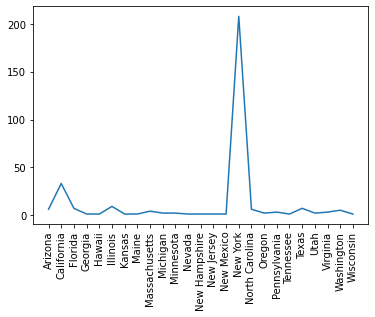

In [34]:
plt.plot(states_count)
plt.xticks(rotation=90)
plt.show()

In [35]:
sep_analysis_df=pd.get_dummies(final_rest_df[['Category']],prefix="",prefix_sep="")
sep_analysis_df=sep_analysis_df.join(analysis_df)
sep_analysis_df.head()

,American (New),American Restaurant,Asian Restaurants,Bars Clubs,Beauty Salons,Breakfast Spot,British (Modern),Caf,Café,Chinese Restaurant,...,Southeast Asian,Vegetarian / Vegan Restaurant,Vietnamese Restaurant Sunset Park,State,Labor force participation,Unemployment rate,Poverty rate,Gini coefficient,GDP per capita,People with less than 9 years of education/people with college degree or above
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,Arizona,62.245455,7.063636,12.054545,0.458882,41854.130475,0.256026
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,Arizona,62.245455,7.063636,12.054545,0.458882,41854.130475,0.256026
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,Arizona,62.245455,7.063636,12.054545,0.458882,41854.130475,0.256026
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,Arizona,62.245455,7.063636,12.054545,0.458882,41854.130475,0.256026
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,Arizona,62.245455,7.063636,12.054545,0.458882,41854.130475,0.256026


In [36]:
states_count=states_count.reset_index()
grouped_analysis_df=sep_analysis_df.groupby('State').mean().reset_index()
grouped_analysis_df=grouped_analysis_df.join(states_count[['Count']])
grouped_analysis_df.head()

,State,American (New),American Restaurant,Asian Restaurants,Bars Clubs,Beauty Salons,Breakfast Spot,British (Modern),Caf,Café,...,Southeast Asian,Vegetarian / Vegan Restaurant,Vietnamese Restaurant Sunset Park,Labor force participation,Unemployment rate,Poverty rate,Gini coefficient,GDP per capita,People with less than 9 years of education/people with college degree or above,Count
0,Arizona,0.0,0.0,0.333333,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.166667,0.0,62.245455,7.063636,12.054545,0.458882,41854.130475,0.256026,6
1,California,0.0,0.0,0.030303,0.000000,0.0,0.0,0.0,0.030303,0.0,...,0.0,0.000000,0.0,64.172727,8.281818,11.190909,0.476300,57225.127065,0.341333,33
2,Florida,0.0,0.0,0.000000,0.142857,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,61.709091,6.927273,10.927273,0.475800,42306.031727,0.212094,7
3,Georgia,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,65.118182,7.436364,12.927273,0.471709,46127.402215,0.209254,1
4,Hawaii,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,1.0,0.000000,0.0,63.490909,4.763636,7.281818,0.432991,53741.171865,0.154596,1


In [37]:
grouped_cat_df=grouped_analysis_df.drop(['Labor force participation','Unemployment rate','Poverty rate','Gini coefficient',
                                         'GDP per capita',
                                         'People with less than 9 years of education/people with college degree or above',
                                         'Count'],axis=1)
x,y=np.zeros(grouped_cat_df.shape[0])+0.0000001,np.zeros(grouped_cat_df.shape[0])+0.0000001
none_cols=pd.DataFrame.from_dict({'-':x,'--':y})
grouped_cat_df=grouped_cat_df.join(none_cols)
grouped_cat_df.head()

,State,American (New),American Restaurant,Asian Restaurants,Bars Clubs,Beauty Salons,Breakfast Spot,British (Modern),Caf,Café,...,New York City,Pizza,Pizza Place,Restaurant,Scandinavian Restaurant,Southeast Asian,Vegetarian / Vegan Restaurant,Vietnamese Restaurant Sunset Park,-,--
0,Arizona,0.0,0.0,0.333333,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.500000,0.0,0.0,0.166667,0.0,1.000000e-07,1.000000e-07
1,California,0.0,0.0,0.030303,0.000000,0.0,0.0,0.0,0.030303,0.0,...,0.0,0.030303,0.0,0.666667,0.0,0.0,0.000000,0.0,1.000000e-07,1.000000e-07
2,Florida,0.0,0.0,0.000000,0.142857,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.714286,0.0,0.0,0.000000,0.0,1.000000e-07,1.000000e-07
3,Georgia,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,1.000000,0.0,0.0,0.000000,0.0,1.000000e-07,1.000000e-07
4,Hawaii,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,1.0,0.000000,0.0,1.000000e-07,1.000000e-07


In [38]:
def return_most_common_bus(row, num_top_bus):
    row_categories=row.iloc[1:]
    row_categories_sorted=row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_bus]

In [39]:
indicators = ['st', 'nd', 'rd']
columns = ['State']
for ind in np.arange(3):
    columns.append('{}{} Most Common Business'.format(ind+1, indicators[ind]))

top_3_bus_df=pd.DataFrame(columns=columns)
top_3_bus_df['State'] = grouped_cat_df['State']
for ind in np.arange(top_3_bus_df.shape[0]):
    top_3_bus_df.iloc[ind, 1:] = return_most_common_bus(grouped_cat_df.iloc[ind, :], 3)

top_3_bus_df.head(10)

,State,1st Most Common Business,2nd Most Common Business,3rd Most Common Business
0,Arizona,Restaurant,Asian Restaurants,Vegetarian / Vegan Restaurant
1,California,Restaurant,Indian Restaurant,Natural food restaurants
2,Florida,Restaurant,Bars Clubs,New American Restaurant
3,Georgia,Restaurant,--,-
4,Hawaii,Southeast Asian,--,-
5,Illinois,Restaurant,Mexican Restaurant,Asian Restaurants
6,Kansas,Indian Restaurant,-,--
7,Maine,Health Food Restaurants,--,-
8,Massachusetts,Restaurant,--,-
9,Michigan,Pizza,Mediterranean Restaurant,--


### From now on, I'll use the k-means algorithm to classify the states and the preffered type of business.

In [40]:
kclusters = 5
ga_df_clustering = grouped_analysis_df.drop('State', 1)
kmeans1 = KMeans(n_clusters=kclusters, random_state=0).fit(ga_df_clustering)
kmeans1.labels_

array([3, 0, 3, 1, 4, 0, 1, 3, 2, 3, 0, 4, 4, 0, 3, 2, 1, 1, 4, 3, 4, 1,
       0, 0, 1])

In [41]:
top_3_bus_df.insert(1, 'Cluster Labels', kmeans1.labels_)
top_3_bus_df=top_3_bus_df.join(grouped_analysis_df[['Count']])
top_3_bus_df.head()

,State,Cluster Labels,1st Most Common Business,2nd Most Common Business,3rd Most Common Business,Count
0,Arizona,3,Restaurant,Asian Restaurants,Vegetarian / Vegan Restaurant,6
1,California,0,Restaurant,Indian Restaurant,Natural food restaurants,33
2,Florida,3,Restaurant,Bars Clubs,New American Restaurant,7
3,Georgia,1,Restaurant,--,-,1
4,Hawaii,4,Southeast Asian,--,-,1


Now I'll separate and analyse the five cluster levels to pick up the results.

In [42]:
top_3_bus_df.loc[top_3_bus_df['Cluster Labels'] == 0,
                    top_3_bus_df.columns[list(range(0, top_3_bus_df.shape[1]))]]

,State,Cluster Labels,1st Most Common Business,2nd Most Common Business,3rd Most Common Business,Count
1,California,0,Restaurant,Indian Restaurant,Natural food restaurants,33
5,Illinois,0,Restaurant,Mexican Restaurant,Asian Restaurants,9
10,Minnesota,0,Beauty Salons,Restaurant,--,2
13,New Jersey,0,Natural food restaurants,--,-,1
22,Virginia,0,Asian Restaurants,Restaurant,--,3
23,Washington,0,Restaurant,Bars Clubs,--,5


In [43]:
top_3_bus_df.loc[top_3_bus_df['Cluster Labels'] == 1,
                    top_3_bus_df.columns[list(range(0, top_3_bus_df.shape[1]))]]

,State,Cluster Labels,1st Most Common Business,2nd Most Common Business,3rd Most Common Business,Count
3,Georgia,1,Restaurant,--,-,1
6,Kansas,1,Indian Restaurant,-,--,1
16,North Carolina,1,Restaurant,New American Restaurant,Grocery Store,6
17,Oregon,1,Restaurant,--,-,2
21,Utah,1,Restaurant,--,-,2
24,Wisconsin,1,Restaurant,--,-,1


In [44]:
top_3_bus_df.loc[top_3_bus_df['Cluster Labels'] == 2,
                    top_3_bus_df.columns[list(range(0, top_3_bus_df.shape[1]))]]

,State,Cluster Labels,1st Most Common Business,2nd Most Common Business,3rd Most Common Business,Count
8,Massachusetts,2,Restaurant,--,-,4
15,New York,2,Vegetarian / Vegan Restaurant,Restaurant,Indian Restaurant,208


In [45]:
top_3_bus_df.loc[top_3_bus_df['Cluster Labels'] == 3,
                    top_3_bus_df.columns[list(range(0, top_3_bus_df.shape[1]))]]

,State,Cluster Labels,1st Most Common Business,2nd Most Common Business,3rd Most Common Business,Count
0,Arizona,3,Restaurant,Asian Restaurants,Vegetarian / Vegan Restaurant,6
2,Florida,3,Restaurant,Bars Clubs,New American Restaurant,7
7,Maine,3,Health Food Restaurants,--,-,1
9,Michigan,3,Pizza,Mediterranean Restaurant,--,2
14,New Mexico,3,Restaurant,--,-,1
19,Tennessee,3,Restaurant,--,-,1


In [46]:
top_3_bus_df.loc[top_3_bus_df['Cluster Labels'] == 4,
                    top_3_bus_df.columns[list(range(0, top_3_bus_df.shape[1]))]]

,State,Cluster Labels,1st Most Common Business,2nd Most Common Business,3rd Most Common Business,Count
4,Hawaii,4,Southeast Asian,--,-,1
11,Nevada,4,Japanese Restaurant,--,-,1
12,New Hampshire,4,Mexican Restaurant,--,-,1
18,Pennsylvania,4,Restaurant,Coffee Shop,--,3
20,Texas,4,Restaurant,Italian Restaurant,Gluten-free Restaurant,7


### I'll make a map with the states and the cluster classification.

In [47]:
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

[latitude,longitude]=[41.00309518604297,-99.5439445015379]
usa_map=folium.Map(location=[latitude,longitude],zoom_start=4)

In [48]:
location_df=final_rest_df[['State','Latitude','Longitude']].copy()
location_df=location_df.groupby('State').mean().reset_index()
markers_colors = []

for lat, lon, poi, cluster in zip(location_df['Latitude'],location_df['Longitude'],
                                  top_3_bus_df['State'],top_3_bus_df['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=9,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(usa_map)
    
    folium.Marker([lat, lon], popup=poi).add_to(usa_map)
    
usa_map

Here I'll print some dataframes that will help analysing the results.

In [49]:
print_analysis_df=analysis_df.groupby('State').max().reset_index()
print_analysis_df.insert(1, 'Cluster Labels', kmeans1.labels_)

In [50]:
print_analysis_df.loc[print_analysis_df['Cluster Labels'] == 0,
                    print_analysis_df.columns[list(range(0, print_analysis_df.shape[1]))]]

,State,Cluster Labels,Labor force participation,Unemployment rate,Poverty rate,Gini coefficient,GDP per capita,People with less than 9 years of education/people with college degree or above
1,California,0,64.172727,8.281818,11.190909,0.476300,57225.127065,0.341333
5,Illinois,0,66.463636,7.536364,9.918182,0.470091,55323.663187,0.190934
10,Minnesota,0,71.400000,5.300000,6.909091,0.441000,54911.237655,0.104328
13,New Jersey,0,65.945455,6.981818,7.418182,0.467736,59402.801344,0.154662
22,Virginia,0,67.590909,5.045455,7.736364,0.461218,54667.508723,0.149070
23,Washington,0,66.081818,6.909091,8.554545,0.446655,57899.217871,0.127759


In [51]:
print_analysis_df.loc[print_analysis_df['Cluster Labels'] == 1,
                    print_analysis_df.columns[list(range(0, print_analysis_df.shape[1]))]]

,State,Cluster Labels,Labor force participation,Unemployment rate,Poverty rate,Gini coefficient,GDP per capita,People with less than 9 years of education/people with college degree or above
3,Georgia,1,65.118182,7.436364,12.927273,0.471709,46127.402215,0.209254
6,Kansas,1,69.572727,5.309091,8.781818,0.447818,48176.654972,0.135461
16,North Carolina,1,63.536364,7.436364,12.127273,0.466782,46612.698606,0.217748
17,Oregon,1,64.136364,7.609091,10.436364,0.451882,45165.109819,0.142109
21,Utah,1,69.472727,4.772727,8.445455,0.418427,45501.514735,0.104444
24,Wisconsin,1,69.490909,6.181818,8.109091,0.432945,47745.438506,0.130980


In [52]:
print_analysis_df.loc[print_analysis_df['Cluster Labels'] == 2,
                    print_analysis_df.columns[list(range(0, print_analysis_df.shape[1]))]]

,State,Cluster Labels,Labor force participation,Unemployment rate,Poverty rate,Gini coefficient,GDP per capita,People with less than 9 years of education/people with college degree or above
8,Massachusetts,2,65.981818,6.127273,7.800000,0.473655,64915.326216,0.125295
15,New York,2,62.163636,6.590909,11.390909,0.502536,64815.733018,0.209493


In [53]:
print_analysis_df.loc[print_analysis_df['Cluster Labels'] == 3,
                    print_analysis_df.columns[list(range(0, print_analysis_df.shape[1]))]]

,State,Cluster Labels,Labor force participation,Unemployment rate,Poverty rate,Gini coefficient,GDP per capita,People with less than 9 years of education/people with college degree or above
0,Arizona,3,62.245455,7.063636,12.054545,0.458882,41854.130475,0.256026
2,Florida,3,61.709091,6.927273,10.927273,0.475800,42306.031727,0.212094
7,Maine,3,65.218182,6.172727,8.963636,0.440882,40482.568930,0.129075
9,Michigan,3,62.336364,8.727273,11.245455,0.454655,42591.754641,0.135057
14,New Mexico,3,60.554545,6.172727,15.018182,0.466709,43001.618282,0.293175
19,Tennessee,3,62.263636,7.190909,12.881818,0.472464,43883.257320,0.271175


In [54]:
print_analysis_df.loc[print_analysis_df['Cluster Labels'] == 4,
                    print_analysis_df.columns[list(range(0, print_analysis_df.shape[1]))]]

,State,Cluster Labels,Labor force participation,Unemployment rate,Poverty rate,Gini coefficient,GDP per capita,People with less than 9 years of education/people with college degree or above
4,Hawaii,4,63.490909,4.763636,7.281818,0.432991,53741.171865,0.154596
11,Nevada,4,66.109091,8.418182,10.000000,0.442727,50431.417945,0.289371
12,New Hampshire,4,69.909091,4.554545,5.363636,0.427718,50816.245219,0.083327
18,Pennsylvania,4,63.818182,6.372727,8.927273,0.461364,49886.436044,0.139191
20,Texas,4,65.645455,5.945455,13.409091,0.476227,53371.744154,0.373565
